In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df = pd.read_csv('csvsFinales/willyrex.csv', index_col=0)
df.head()

,NOX,O3,PM10,RH,SR,TOUT,WSR,WDR,Planta
0,20.7,28,46.0,5,0.039,33.81,2.3,11,1
1,60.4,6,74.0,17,0.000,27.15,1.2,168,1
2,90.1,6,89.0,21,0.000,25.57,2.3,156,1
3,21.7,16,40.0,29,0.000,6.93,3.8,172,1
4,14.1,21,31.0,30,0.000,7.17,6.2,157,1


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NOX,39904.0,22.607937,16.536648,1.100,11.40,17.700,28.400,173.000
O3,39904.0,27.944993,19.090769,1.000,14.00,24.000,38.000,141.000
PM10,39904.0,59.315610,28.089622,3.000,39.00,54.000,75.000,178.000
RH,39904.0,52.575406,20.250613,0.000,37.00,53.000,69.000,96.000
SR,39904.0,0.183568,0.280920,-0.006,0.00,0.013,0.302,7.655
TOUT,39904.0,24.043088,7.340087,-3.220,19.92,24.830,29.050,42.630
WSR,39904.0,10.617487,4.886897,0.100,6.90,10.300,14.000,112.700
WDR,39904.0,90.346908,42.571142,1.000,67.00,99.000,121.000,178.000
Planta,39904.0,3.215267,1.435992,1.000,2.00,3.000,5.000,5.000


<Axes: >

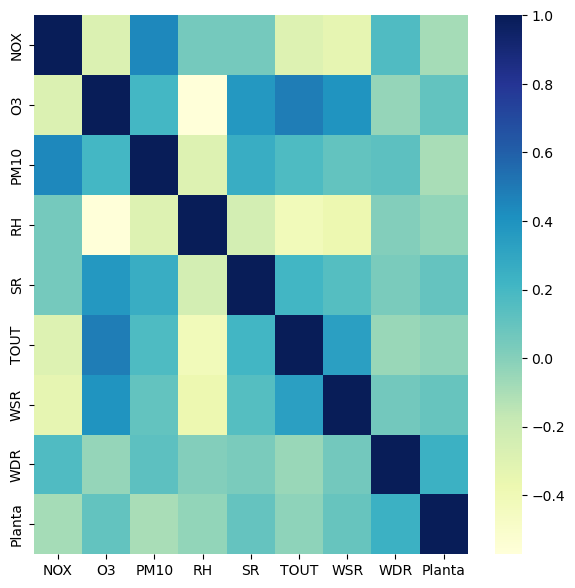

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu',linecolor="white")

# Analisis de Componentes Principales

In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.values

In [21]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Calculamos la matriz de covarianza
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00002506 -0.27913381  0.44642864  0.05426652  0.05235537 -0.2948666
  -0.33275878  0.1701129  -0.08245774]
 [-0.27913381  1.00002506  0.20362935 -0.57183542  0.37005222  0.48555607
   0.39285298 -0.04023235  0.10729643]
 [ 0.44642864  0.20362935  1.00002506 -0.29423018  0.25906857  0.176919
   0.10836709  0.12254706 -0.0953948 ]
 [ 0.05426652 -0.57183542 -0.29423018  1.00002506 -0.23581616 -0.41487064
  -0.37466739  0.01121674 -0.03687522]
 [ 0.05235537  0.37005222  0.25906857 -0.23581616  1.00002506  0.21250524
   0.15020325  0.03157304  0.10328106]
 [-0.2948666   0.48555607  0.176919   -0.41487064  0.21250524  1.00002506
   0.33276269 -0.05425831 -0.0203178 ]
 [-0.33275878  0.39285298  0.10836709 -0.37466739  0.15020325  0.33276269
   1.00002506  0.05807336  0.09271531]
 [ 0.1701129  -0.04023235  0.12254706  0.01121674  0.03157304 -0.05425831
   0.05807336  1.00002506  0.24258542]
 [-0.08245774  0.10729643 -0.0953948  -0.03687522  0.10328106 -0.0203178


In [22]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.19710418  0.65639119  0.06530575  0.62863802 -0.2930346  -0.00215958
   0.20519444  0.05226864  0.01179983]
 [ 0.51043155 -0.03445685  0.00810664  0.45807478  0.62181895  0.13899265
   0.12875724 -0.10607224 -0.30751685]
 [ 0.20588842  0.60893922  0.15983217 -0.42554315  0.41884987 -0.16122814
   0.05340106  0.08694041  0.41027996]
 [-0.46132825 -0.12137138 -0.08378815  0.33460389  0.42542031  0.15018437
  -0.46915622 -0.01024567  0.47928561]
 [ 0.30125392  0.25857987 -0.06477213 -0.11486181 -0.22139694  0.7034984
  -0.50397078  0.13777842 -0.08998788]
 [ 0.43795532 -0.10059674  0.14359734  0.16964244 -0.31136349 -0.1210529
  -0.13546793 -0.63000694  0.47097278]
 [ 0.3962924  -0.16038744 -0.13520008  0.23822456 -0.15172907 -0.38490506
  -0.20313691  0.69311838  0.22214159]
 [-0.00409824  0.27847268 -0.62634885 -0.04848087  0.03895685 -0.42776373
  -0.40483725 -0.28639813 -0.31201981]
 [ 0.07597716 -0.04659315 -0.72642625 -0.02935769 -0.02347505  0.30237229
   0.49077

In [26]:
for i in range(len(eig_vals)):
    print(f'{df.columns[i]}:' + '\t' + f' {eig_vals[i]}')

NOX:	 2.6630890888962813
O3:	 1.643946460518756
PM10:	 1.2626231375388128
RH:	 0.29880384485306694
SR:	 0.40018711103185534
TOUT:	 0.8697072026500012
WSR:	 0.6796382146572719
WDR:	 0.638001540616975
Planta:	 0.5442289461883439


In [30]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

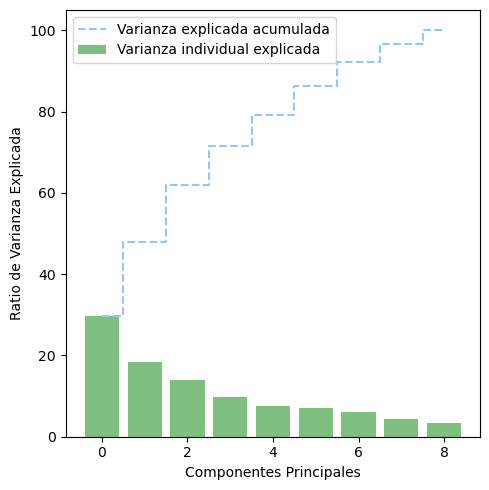

In [31]:
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(5,5))

    plt.bar(range(len(eig_vals)), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(len(eig_vals)), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()